<a href="https://colab.research.google.com/github/sivasubramanian2004/24mcr104/blob/main/DEEPLEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/drive/MyDrive/archive (2).zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3241.jpg', 'with_mask_1593.jpg', 'with_mask_539.jpg', 'with_mask_2560.jpg', 'with_mask_2762.jpg']
['with_mask_143.jpg', 'with_mask_250.jpg', 'with_mask_1647.jpg', 'with_mask_1099.jpg', 'with_mask_439.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_611.jpg', 'without_mask_1315.jpg', 'without_mask_3214.jpg', 'without_mask_3537.jpg', 'without_mask_2898.jpg']
['without_mask_424.jpg', 'without_mask_1321.jpg', 'without_mask_590.jpg', 'without_mask_2938.jpg', 'without_mask_556.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
#Creating Labels for the two class of Images

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


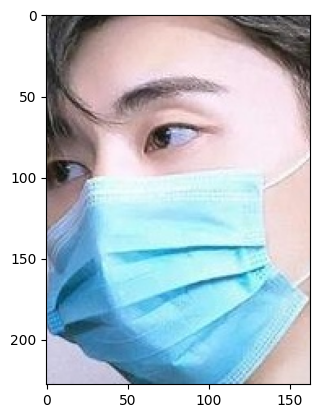

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

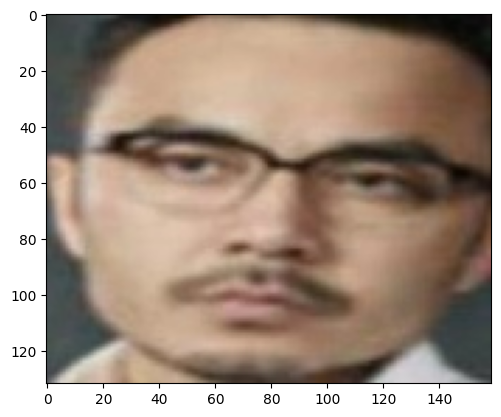

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_556.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)


7553

array([[[201, 204, 197],
        [206, 209, 202],
        [209, 212, 205],
        ...,
        [191, 171, 160],
        [189, 170, 160],
        [188, 169, 159]],

       [[196, 199, 192],
        [203, 206, 199],
        [208, 211, 204],
        ...,
        [192, 174, 157],
        [191, 172, 156],
        [189, 169, 153]],

       [[205, 208, 201],
        [206, 209, 202],
        [208, 211, 204],
        ...,
        [195, 177, 160],
        [197, 176, 161],
        [195, 173, 159]],

       ...,

       [[ 87,  75,  63],
        [113, 103,  92],
        [146, 136, 128],
        ...,
        [ 48,  21,  13],
        [ 45,  14,   7],
        [ 50,  14,   8]],

       [[ 68,  58,  53],
        [ 89,  80,  75],
        [114, 106, 103],
        ...,
        [ 49,  17,   7],
        [ 50,  16,   7],
        [ 52,  14,   7]],

       [[ 65,  55,  53],
        [ 96,  86,  85],
        [140, 132, 131],
        ...,
        [ 54,  17,   9],
        [ 54,  16,   9],
        [ 55,  12,   8]]], dtype=uint8)
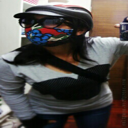

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:

# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
#Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [212, 114,  71],
        [210, 110,  67],
        [209, 114,  70]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [209, 111,  64],
        [212, 113,  65],
        [212, 116,  68]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [214, 117,  64],
        [217, 120,  67],
        [217, 122,  70]],

       ...,

       [[208, 134, 103],
        [187, 104,  68],
        [200, 108,  64],
        ...,
        [211, 229, 248],
        [207, 222, 242],
        [221, 231, 251]],

       [[192, 109,  73],
        [189, 101,  61],
        [200, 105,  60],
        ...,
        [213, 230, 249],
        [206, 222, 245],
        [214, 228, 251]],

       [[188,  98,  57],
        [191,  97,  54],
        [203, 105,  59],
        ...,
        [216, 233, 251],
        [207, 224, 248],
        [209, 226, 251]]], dtype=uint8)
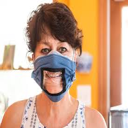

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.83137255, 0.44705882, 0.27843137],
        [0.82352941, 0.43137255, 0.2627451 ],
        [0.81960784, 0.44705882, 0.2745098 ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.81960784, 0.43529412, 0.25098039],
        [0.83137255, 0.44313725, 0.25490196],
        [0.83137255, 0.45490196, 0.26666667]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.83921569, 0.45882353, 0.25098039],
        [0.85098039, 0.47058824, 0.2627451 ],
        [0.85098039, 0.47843137, 0.2745098 ]],

       ...,

       [[0.81568627, 0.5254902 , 0.40392157],
        [0.73333333, 0.40784314, 0.26666667],
        [0.78431373, 0

In [ ]:
Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 86s 505ms/step - acc: 0.9499 - loss: 0.1404 - val_acc: 0.9207 - val_loss: 0.2521
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 81s 475ms/step - acc: 0.9568 - loss: 0.1073 - val_acc: 0.9091 - val_loss: 0.3015
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 83s 487ms/step - acc: 0.9511 - loss: 0.1177 - val_acc: 0.9273 - val_loss: 0.2864
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 80s 469ms/step - acc: 0.9681 - loss: 0.0781 - val_acc: 0.9207 - val_loss: 0.2765
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 83s 477ms/step - acc: 0.9698 - loss: 0.0827 - val_acc: 0.9306 - val_loss: 0.3101


In [ ]:
Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - acc: 0.9202 - loss: 0.2698
Test Accuracy = 0.9285241365432739


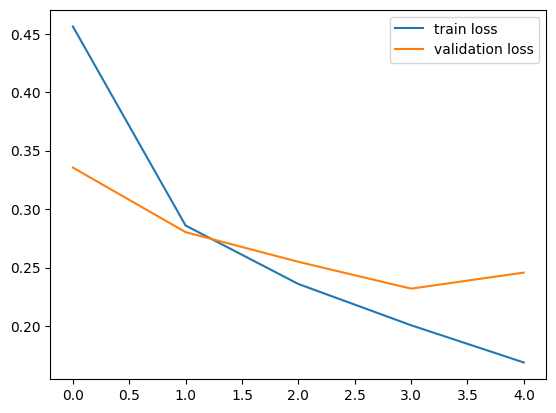

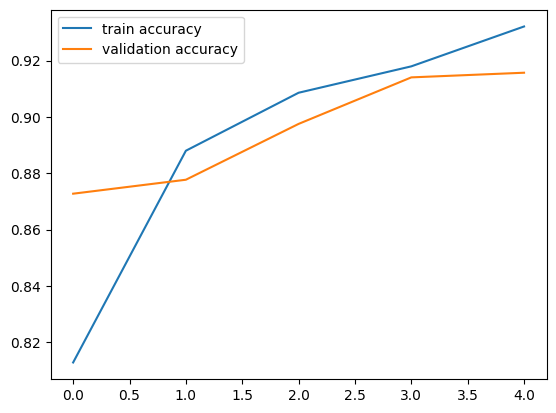

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()